In [ ]:
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)

import numpy as np # linear algebra

import matplotlib.pyplot as plt #data visualization library
%matplotlib inline 

import seaborn as sns #data visualization library based on matplotlib

## Reading the csv file

In [2]:
ad=pd.read_csv("advertising.csv")

* First five dataset

In [3]:
ad.head() 

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


* Last five dataset

In [4]:
ad.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
ad.shape # Shape of dataset i.e. dataset has 34,857 rows and 21 columns 

(200, 4)

In [6]:
ad.size # Shape of dataset i.e. dataset has 7,31,997 entries 

800

In [7]:
ad.isna().sum() 

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

* No Null values or the missing values found 

In [8]:
ad.describe()  # Statistical description about the dataset

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


 ## Exploratory Data Analysis (EDA)

In [10]:
ad.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


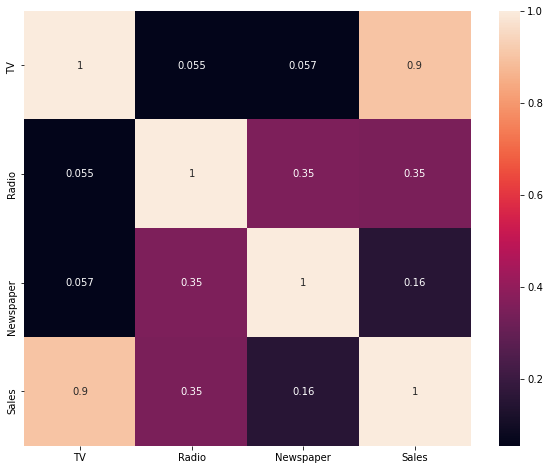

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(data=ad.corr(),annot=True);

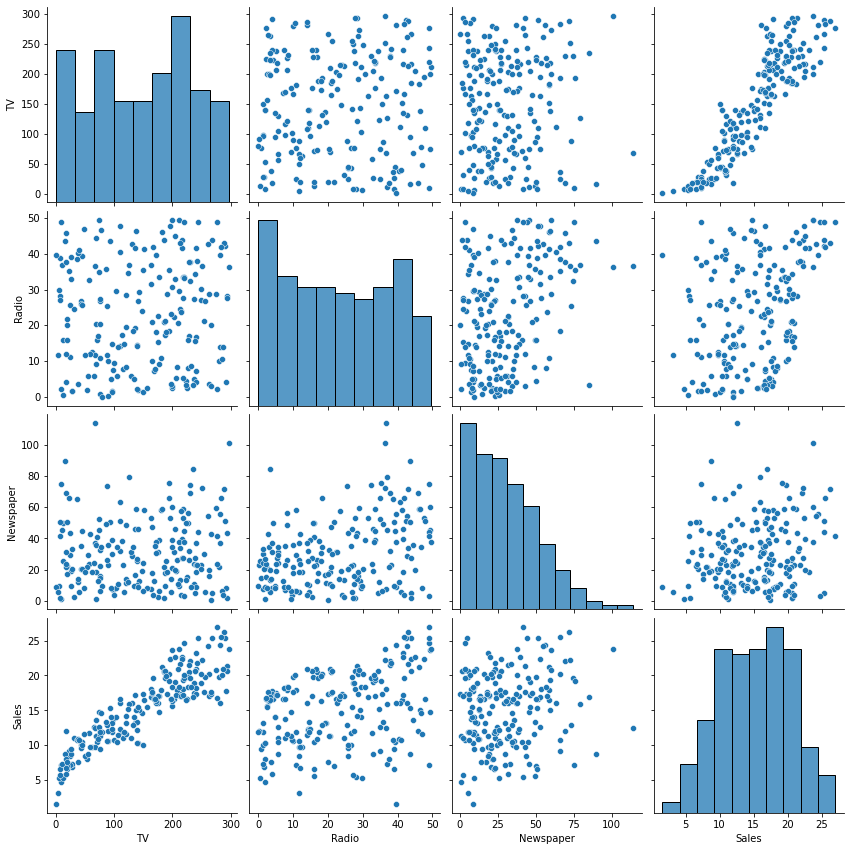

In [12]:
sns.pairplot(ad,height=3,aspect=1,kind="scatter");

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


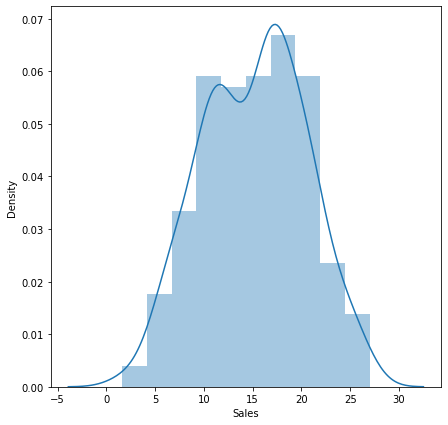

In [13]:
plt.figure(figsize=(7,7))
sns.distplot(ad['Sales']);

* From describe () we can deduced that there is no outliers to deal with so we skip it 

### Since we dont have any categorical data we dont have to deal with it 

## Applying the machine learning algorithm ( Linear Regression )

In [14]:
# importing train test split
from sklearn.model_selection import train_test_split

In [ ]:
# model Selection
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [15]:
X=ad[['TV']]
y=ad['Sales']

In [16]:
# split the data in traininig and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
# Fitting the model 
slr=LinearRegression()
slr.fit(X_train,y_train)

LinearRegression()

In [29]:
slr.score(X_train,y_train)

0.8134866044709264

In [30]:
slr.score(X_test,y_test)

0.802561303423698

##

In [32]:
from sklearn import linear_model
lasso=linear_model.Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [33]:
lasso.score(X_test,y_test)

0.8025572270938139

In [34]:
lasso.score(X_train,y_train)

0.8134813355792655

In [39]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=50, max_iter=100, tol=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [40]:
ridge.score(X_test,y_test)

0.8025613249438913

In [41]:
ridge.score(X_train,y_train)

0.8134866028871276

In [42]:
from sklearn.linear_model import ElasticNet
En_reg= ElasticNet()
En_reg.fit(X_train,y_train)

ElasticNet()

In [43]:
En_reg.score(X_test,y_test)

0.8025605010215789

In [44]:
En_reg.score(X_train,y_train)

0.8134851372335039

In [18]:
print("Intercept: ",slr.intercept_)
print('Coefficient: ',slr.coef_)

Intercept:  7.007108428241851
Coefficient:  [0.05548294]


In [19]:
print('Regression Equation: Sales = 6.948 + 0.054 * TV')

Regression Equation: Sales = 6.948 + 0.054 * TV


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


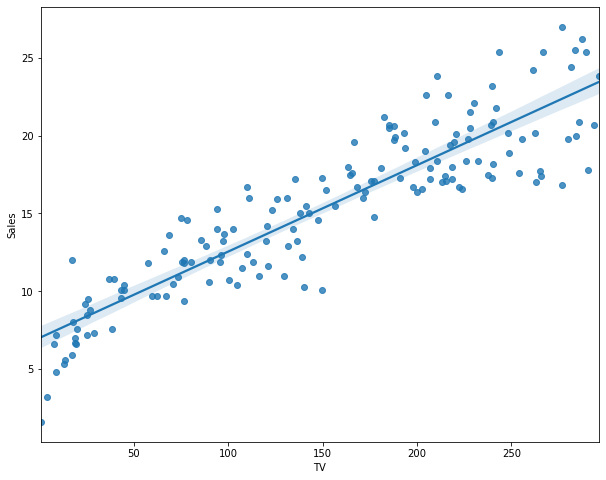

In [20]:
plt.figure(figsize=(10,8));
sns.regplot(X_train, y_train);

In [21]:
X_pred=slr.predict(X_train)
y_pred=slr.predict(X_test)

In [22]:
print("Prediction for Test Set: {} ".format (y_pred))

Prediction for Test Set: [16.06747317 17.84847567 23.25806271  7.65625887 19.23000098 11.17387752
 19.03581067  9.78125562 19.34651516 16.72217191  8.75482116 10.12524988
 20.01785878  7.30671633 14.74697911 16.45030549  7.41213392 17.97053815
 11.18497411 20.17875932 19.74044406 10.76885203  9.1154603  20.92777906
 10.83543156  9.97544593 18.85271696 14.73588252 11.84522114  7.47316516
 18.09260063 10.84652815 18.04266598  7.94477018 22.58117079 20.22314567
  9.68693462 22.19279018 13.50970946  8.53288939] 


In [23]:
slr_diffrenec=pd.DataFrame({"Actual ": y_test,"Predict": y_pred})
slr_diffrenec

,Actual,Predict
95,16.9,16.067473
15,22.4,17.848476
30,21.4,23.258063
158,7.3,7.656259
128,24.7,19.230001
115,12.6,11.173878
69,22.3,19.035811
170,8.4,9.781256
174,16.5,19.346515
45,16.1,16.722172


In [24]:
slr.predict([[56]])

array([10.11415329])

In [25]:
slr.predict([[78]])

array([11.33477805])

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
print('R squared value of the model: {:.2f}'.format(slr.score(X,y)*100))

R squared value of the model: 81.21


In [28]:
meanerr=metrics.mean_absolute_error(y_test,y_pred)
meansqerr=metrics.mean_squared_error(y_test,y_pred)
rootmean=np.sqrt(metrics.mean_squared_error(y_test,y_pred))

print("Mean Absolute Error",meanerr)
print("Mean Squared Error",meansqerr)
print("Root Mean Squared Error",rootmean)

Mean Absolute Error 1.9502948931650088
Mean Squared Error 6.101072906773964
Root Mean Squared Error 2.470035001123256
